In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-06 20:03:56.046861: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


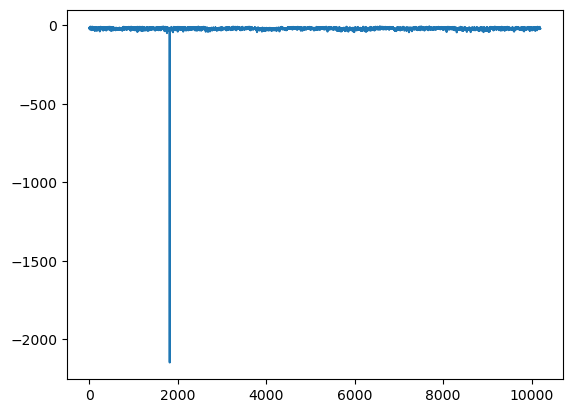

In [6]:
plt.plot(df['sigma0_trip_fore'])

In [7]:
df.replace(-2147.48364258, np.NaN)
df = df[df['sigma0_trip_fore'] > -2000]  
df = df[df['sigma0_trip_mid'] > -2000]  
df = df[df['sigma0_trip_aft'] > -2000]  

In [8]:
df = df.dropna(subset=['UWr', 'rhoair', 'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


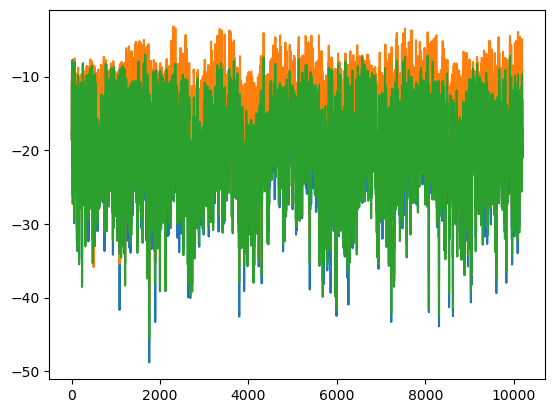

In [9]:
plt.plot(df['sigma0_trip_fore'])
plt.plot(df['sigma0_trip_mid'])
plt.plot(df['sigma0_trip_aft'])

In [10]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1915,-0.201961,-0.217629,300.149998,2467.766767,1018.924802,1020.129993,9.066255,9.099421,91.289449,91.092949,...,-144.729996,-98.779999,-52.829998,57.230000,45.759998,57.110001,20180925T042400Z,20180925T060558.125000Z,-1.324996,-9.157287
5536,-0.031340,-0.102991,321.374998,2484.597794,988.551234,989.756494,5.333242,5.367731,87.789078,87.512804,...,67.919998,112.449997,156.919998,37.090000,27.869999,36.969997,20161202T133600Z,20161202T151758.125000Z,8.425657,5.831279
2221,-0.135799,-0.012509,310.145003,2465.723847,1011.880901,1013.085001,5.661709,5.865417,63.664547,61.978703,...,-25.330000,-70.099998,-114.919998,56.259998,45.200001,56.329998,20171118T150600Z,20171118T164758.125000Z,5.696388,4.825567
6987,-0.012150,-0.032903,326.110002,2477.074875,996.570243,997.777496,4.968449,5.070391,73.010653,72.007445,...,-17.820000,-62.509998,-107.159996,44.660000,34.349998,44.660000,20200902T134500Z,20200902T152358.125000Z,5.843737,-12.798964
1175,-0.017785,0.082188,379.199995,2470.373508,1017.583451,1018.793494,8.602273,8.619167,94.904951,94.999924,...,-26.580000,-71.419998,-116.479996,37.680000,28.279999,37.750000,20160916T183000Z,20160916T201158.125000Z,2.068844,-4.017464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,0.002472,-0.483911,308.620000,2475.771411,1020.576401,1021.794510,7.769904,7.759034,91.002551,90.317374,...,-22.109999,-66.839996,-111.639999,63.369999,52.379997,63.459999,20190507T190000Z,20190507T203858.125000Z,3.252593,-6.708321
7835,-0.012150,-0.032903,243.709999,2490.722807,1016.129567,1017.383490,3.099227,3.176719,65.211853,63.882995,...,109.180000,64.409996,19.490000,38.719997,29.119999,38.680000,20210118T195700Z,20210118T213858.125000Z,6.045154,7.037160
9514,-0.015108,-0.023424,271.820003,2476.751921,1012.855845,1014.073492,6.568907,6.622517,85.247003,84.662779,...,-143.589996,-97.339996,-51.110001,60.009998,48.439999,59.899998,20190816T223300Z,20190817T001458.125000Z,4.198183,-3.982504
2286,-0.391373,-0.002490,284.445001,2467.199084,1014.255245,1015.480997,3.755322,4.023864,57.463447,54.692455,...,115.059998,70.220001,25.500000,53.320000,42.270000,53.199997,20171207T233900Z,20171208T012058.125000Z,10.782610,0.008744


In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10195, 67)

In [13]:
df.shape[0]*0.8

8156.0

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'#,
    #'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft
1915,-15.643591,-14.756548,-17.875481,-144.729996,-98.779999,-52.829998,57.230000,45.759998,57.110001
5536,-11.166398,-8.401650,-16.121201,67.919998,112.449997,156.919998,37.090000,27.869999,36.969997
2221,-24.999752,-20.183023,-19.687904,-25.330000,-70.099998,-114.919998,56.259998,45.200001,56.329998
6987,-12.603307,-11.382163,-18.178478,-17.820000,-62.509998,-107.159996,44.660000,34.349998,44.660000
1175,-20.298883,-15.279989,-21.286087,-26.580000,-71.419998,-116.479996,37.680000,28.279999,37.750000
...,...,...,...,...,...,...,...,...,...
9124,-24.470440,-23.885769,-28.561481,-22.109999,-66.839996,-111.639999,63.369999,52.379997,63.459999
7835,-15.903352,-9.203181,-15.835526,109.180000,64.409996,19.490000,38.719997,29.119999,38.680000
9514,-25.477020,-18.234964,-19.713820,-143.589996,-97.339996,-51.110001,60.009998,48.439999,59.899998
2286,-15.376673,-11.917556,-17.895863,115.059998,70.220001,25.500000,53.320000,42.270000,53.199997


In [17]:
era5 = np.sqrt(df['u10']**2 + df['v10']**2)

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
y = np.sqrt(df['UE']**2 + df['UN']**2)

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
era5_train = era5[:split_idx]
era5_test = era5[split_idx:]

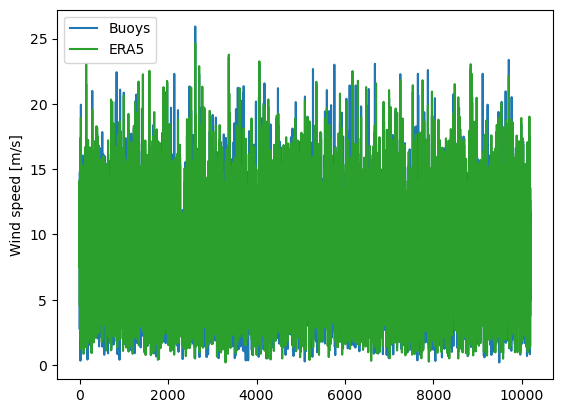

In [22]:

plt.plot(y.values, label='Buoys')
plt.plot(era5.values, label='ERA5', color='C2')
plt.ylabel('Wind speed [m/s]')       
plt.legend()

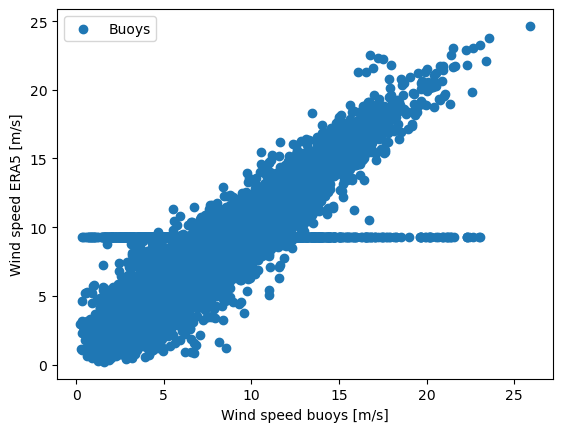

In [23]:
plt.scatter(y.values, era5.values, label='Buoys', cmap = plt.cm.plasma)
plt.xlabel('Wind speed buoys [m/s]')
plt.ylabel('Wind speed ERA5 [m/s]')  
plt.legend()

In [24]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [28]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [29]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [30]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-06 19:18:21.772980: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-06 19:18:21.774117: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 19:18:21.774126: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 19:18:21.774147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-gm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-06 19:18:21.774360: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
179/179 [==============================] - 1s 4ms/step - loss: 10.0756 - mean_absolute_error: 2.5513 - val_loss: 6.3760 - val_mean_absolute_error: 2.0481
Epoch 2/500
179/179 [==============================] - 0s 632us/step - loss: 5.6119 - mean_absolute_error: 1.8988 - val_loss: 3.5527 - val_mean_absolute_error: 1.5118
Epoch 3/500
179/179 [==============================] - 0s 635us/step - loss: 3.1737 - mean_absolute_error: 1.4207 - val_loss: 2.0211 - val_mean_absolute_error: 1.1297
Epoch 4/500
179/179 [==============================] - 0s 606us/step - loss: 1.8075 - mean_absolute_error: 1.0755 - val_loss: 1.2514 - val_mean_absolute_error: 0.8869
Epoch 5/500
179/179 [==============================] - 0s 580us/step - loss: 1.2093 - mean_absolute_error: 0.8761 - val_loss: 0.8947 - val_mean_absolute_error: 0.7489
Epoch 6/500
179/179 [==============================] - 0s 595us/step - loss: 0.9313 - mean_absolute_error: 0.7694 - val_loss: 0.7317 - val_mean_absolute_error: 0.6695

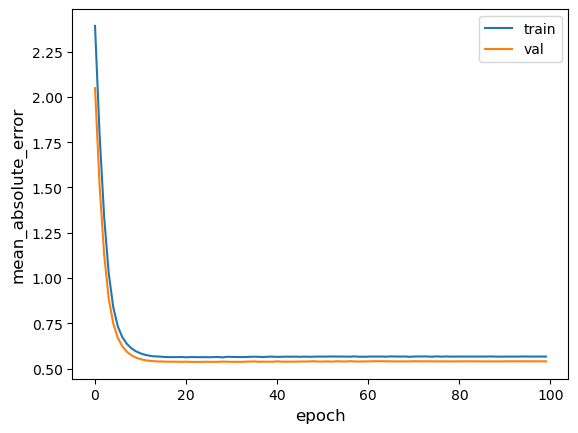

64/64 [==============================] - 0s 326us/step - loss: 0.5764 - mean_absolute_error: 0.5543
Test accuracy 0.5542708039283752
Test loss 0.5764437317848206


In [31]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [32]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [37]:
np.mean(y_test)

8.309828132993244

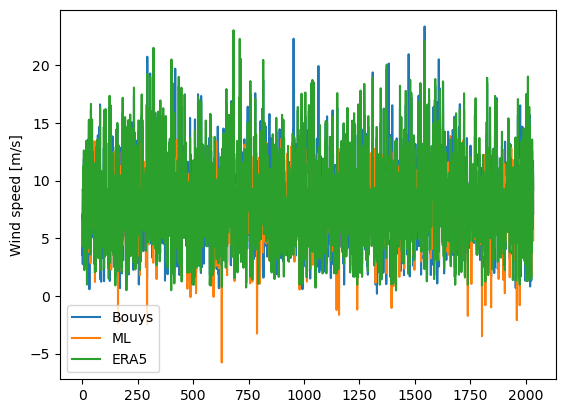

In [33]:
plt.plot(y_test.values, label='Bouys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.ylabel('Wind speed [m/s]')
plt.legend()

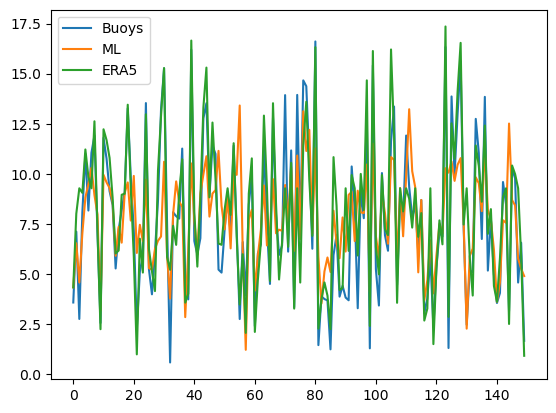

In [35]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

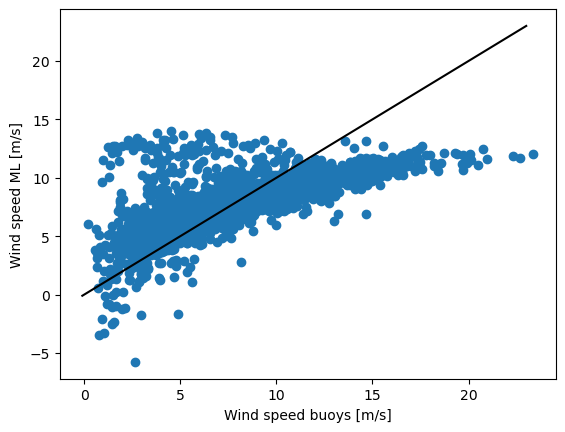

In [37]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [38]:
rmse(y_test.values, y_test_pred)

4.672279921539667

In [39]:
rmse(y_test.values, era5_test)

2.0225046276795084

## Correlation

In [40]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.6729162],
       [0.6729162, 1.       ]])

In [42]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

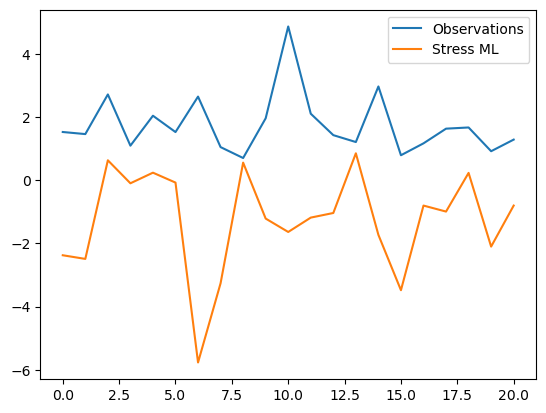

In [43]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [44]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[ 1.        , -0.11210502],
       [-0.11210502,  1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], era5_test.values[y_test_pred[:, 0] < 1])

array([[ 1.        , -0.02422012],
       [-0.02422012,  1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

3.5229599199102117

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.5588 - mean_absolute_error: 0.9489 - val_loss: 0.7254 - val_mean_absolute_error: 0.6423
Epoch 2/500
179/179 [==============================] - 0s 744us/step - loss: 0.7624 - mean_absolute_error: 0.6715 - val_loss: 0.6179 - val_mean_absolute_error: 0.6007
Epoch 3/500
179/179 [==============================] - 0s 705us/step - loss: 0.6230 - mean_absolute_error: 0.6083 - val_loss: 0.5368 - val_mean_absolute_error: 0.5425
Epoch 4/500
179/179 [==============================] - 0s 721us/step - loss: 0.5832 - mean_absolute_error: 0.5681 - val_loss: 0.5120 - val_mean_absolute_error: 0.5224
Epoch 5/500
179/179 [==============================] - 0s 698us/step - loss: 0.5882 - mean_absolute_error: 0.5593 - val_loss: 0.4992 - val_mean_absolute_error: 0.5128
Epoch 6/500
179/179 [==============================] - 0s 701us/step - loss: 0.5478 - mean_absolute_error: 0.5422 - val_loss: 0.4939 - val_mean_absolute_error: 0.5097


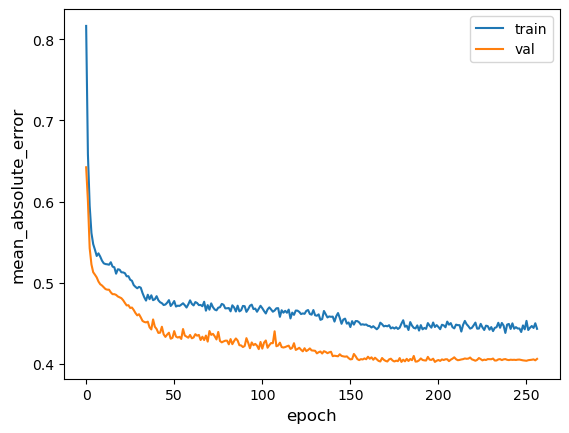

64/64 [==============================] - 0s 367us/step - loss: 0.3479 - mean_absolute_error: 0.4113
Test accuracy 0.41129210591316223
Test loss 0.34793633222579956


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

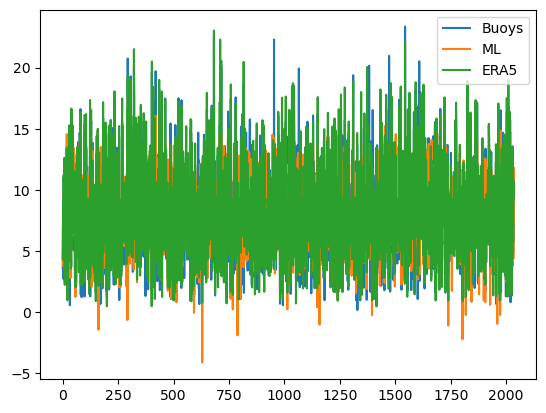

In [53]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

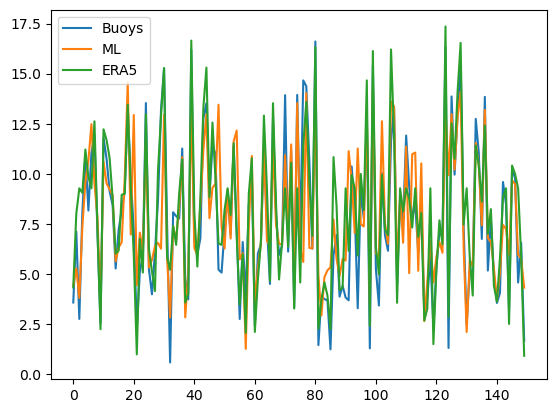

In [55]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

In [56]:
rmse(y_test.values, y_test_pred)

5.069426757365237

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81790672],
       [0.81790672, 1.        ]])

In [58]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [59]:
y_test.values.shape

(2035,)

In [60]:
y_test_pred[:, 0].shape

(2035,)

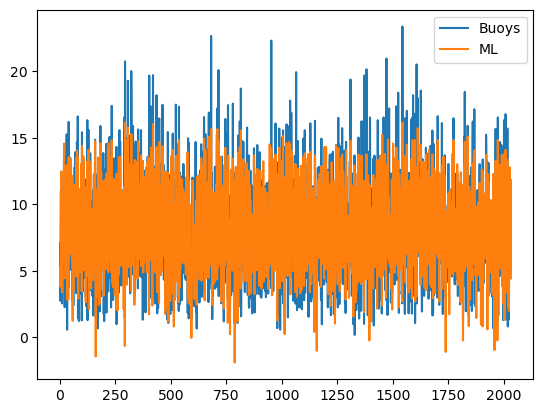

In [62]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Buoys')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

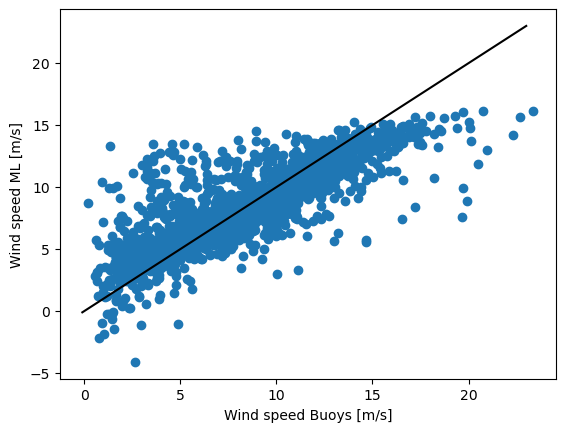

In [65]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed Buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [66]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [67]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [68]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.1525 - mean_absolute_error: 0.8394 - val_loss: 0.6082 - val_mean_absolute_error: 0.5889
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7402 - mean_absolute_error: 0.6592 - val_loss: 0.4660 - val_mean_absolute_error: 0.4921
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6205 - mean_absolute_error: 0.5936 - val_loss: 0.3961 - val_mean_absolute_error: 0.4436
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5419 - mean_absolute_error: 0.5487 - val_loss: 0.3627 - val_mean_absolute_error: 0.4273
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.4605 - mean_absolute_error: 0.5018 - val_loss: 0.3443 - val_mean_absolute_error: 0.4169
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.4692 - mean_absolute_error: 0.5016 - val_loss: 0.3438 - val_mean_absolute_error: 0.4081
Epoch 7/50

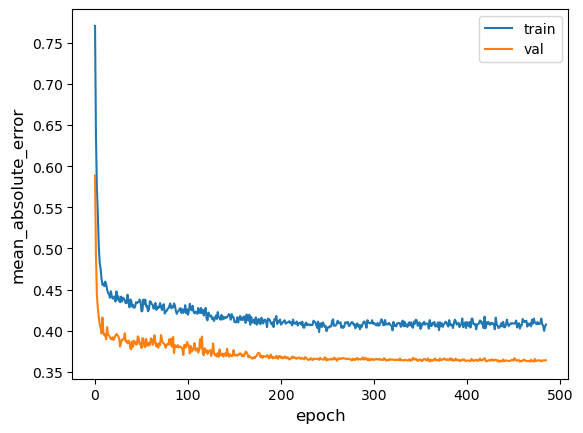

64/64 [==============================] - 0s 364us/step - loss: 0.2545 - mean_absolute_error: 0.3576
Test accuracy 0.3575737774372101
Test loss 0.25450029969215393


In [69]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [70]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [71]:
rmse(y_test.values, y_test_pred)

5.209946715477054

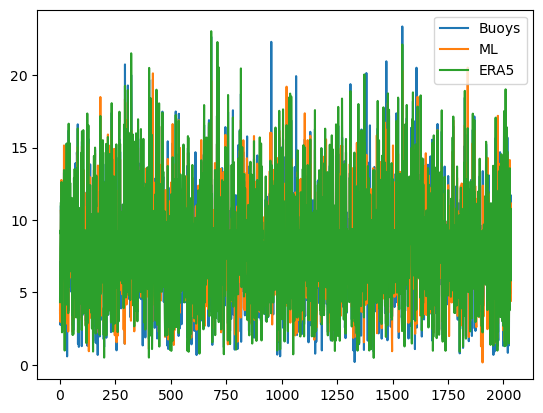

In [72]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

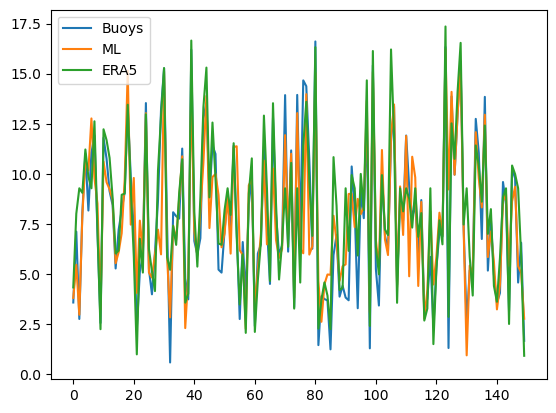

In [77]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

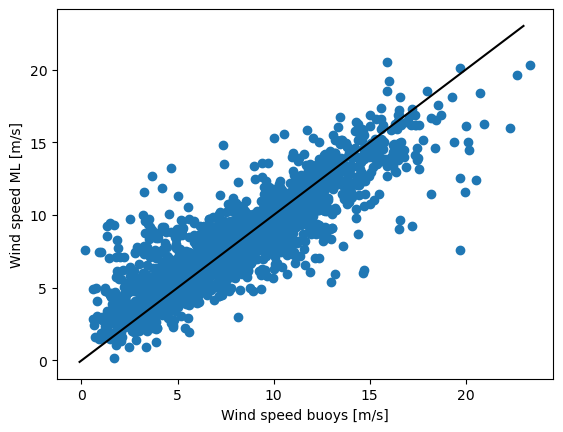

In [78]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [79]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87065322],
       [0.87065322, 1.        ]])

In [80]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

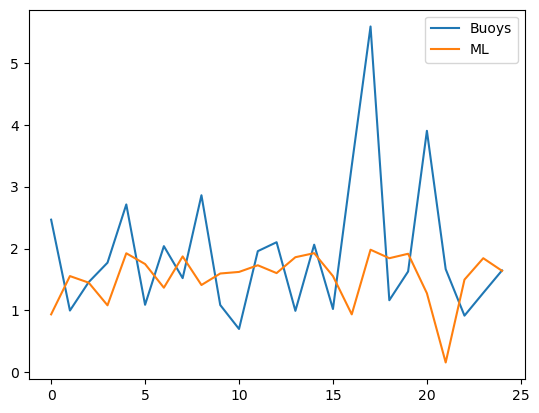

In [81]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Buoys')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='ML')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

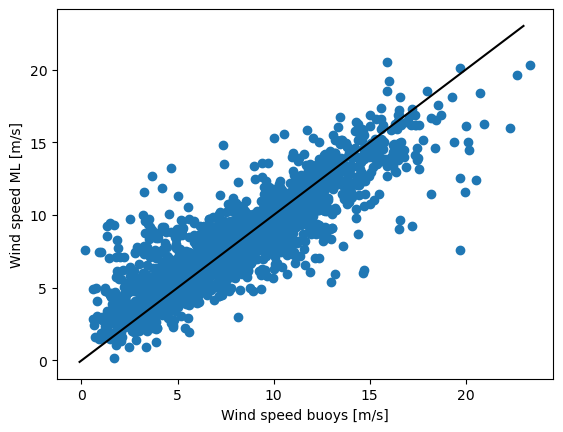

In [83]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [84]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87065322],
       [0.87065322, 1.        ]])

In [86]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [27]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-06 20:04:25.778387: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-06 20:04:25.778646: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 20:04:25.778654: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 20:04:25.778677: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-gm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-06 20:04:25.778902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
179/179 [==============================] - 2s 7ms/step - loss: 2.4270 - mean_absolute_error: 1.1256 - val_loss: 0.7588 - val_mean_absolute_error: 0.6820
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.8133 - mean_absolute_error: 0.6879 - val_loss: 0.5794 - val_mean_absolute_error: 0.5800
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.6915 - mean_absolute_error: 0.6409 - val_loss: 0.4211 - val_mean_absolute_error: 0.4744
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5536 - mean_absolute_error: 0.5594 - val_loss: 0.3701 - val_mean_absolute_error: 0.4297
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.4800 - mean_absolute_error: 0.5195 - val_loss: 0.3886 - val_mean_absolute_error: 0.4529
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.4684 - mean_absolute_error: 0.5026 - val_loss: 0.3405 - val_mean_absolute_error: 0.4147
Epoch 7/50

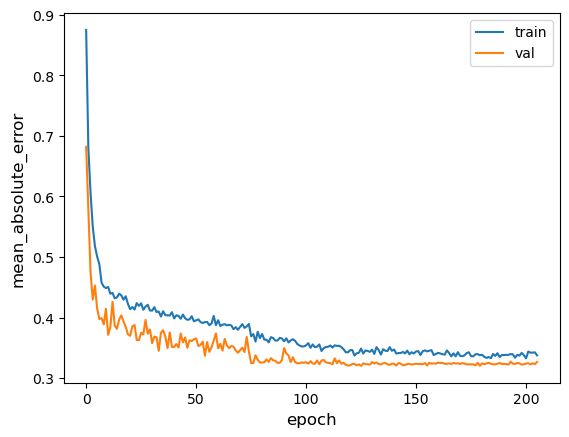

64/64 [==============================] - 0s 706us/step - loss: 0.1901 - mean_absolute_error: 0.3124
Test accuracy 0.31237277388572693
Test loss 0.1900661438703537


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
rmse(y_test.values, y_test_pred)

5.332753501606857

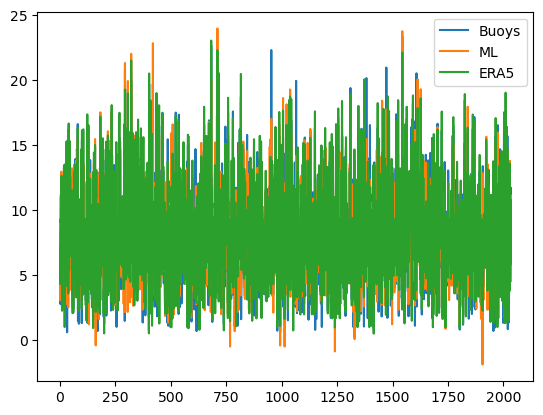

In [31]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

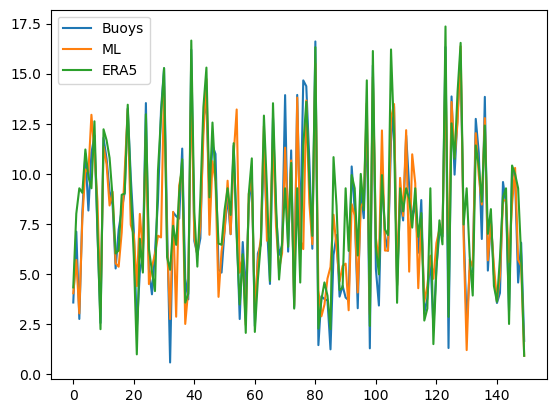

In [32]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

## Correlation

In [33]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.9053049],
       [0.9053049, 1.       ]])

In [34]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

Text(0, 0.5, 'Wind speed ML [m/s]')

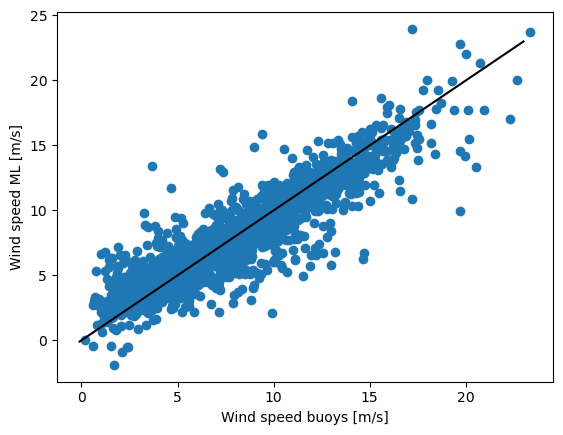

In [35]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [36]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [37]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [38]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 13ms/step - loss: 2.8082 - mean_absolute_error: 1.1751 - val_loss: 1.1764 - val_mean_absolute_error: 0.8431
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 0.9123 - mean_absolute_error: 0.7296 - val_loss: 0.5730 - val_mean_absolute_error: 0.5801
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7348 - mean_absolute_error: 0.6455 - val_loss: 0.4187 - val_mean_absolute_error: 0.4713
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.6110 - mean_absolute_error: 0.5874 - val_loss: 0.3875 - val_mean_absolute_error: 0.4525
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.5199 - mean_absolute_error: 0.5392 - val_loss: 0.3524 - val_mean_absolute_error: 0.4313
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.4665 - mean_absolute_error: 0.5084 - val_loss: 0.3482 - val_mean_absolute_error: 0.4131
Epoc

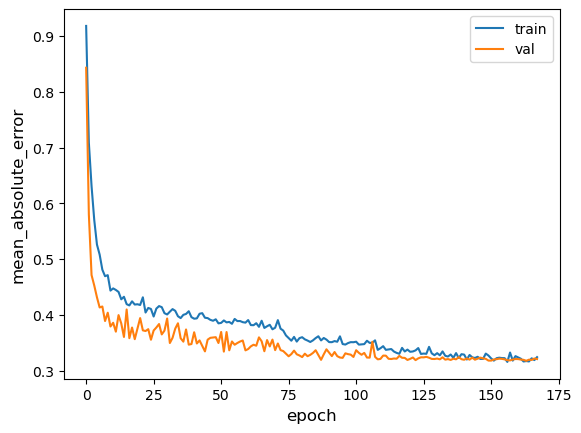

64/64 [==============================] - 0s 2ms/step - loss: 0.1802 - mean_absolute_error: 0.3094
Test accuracy 0.30940455198287964
Test loss 0.18019099533557892


In [39]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [40]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [41]:
rmse(y_test.values, y_test_pred)

5.321051896795659

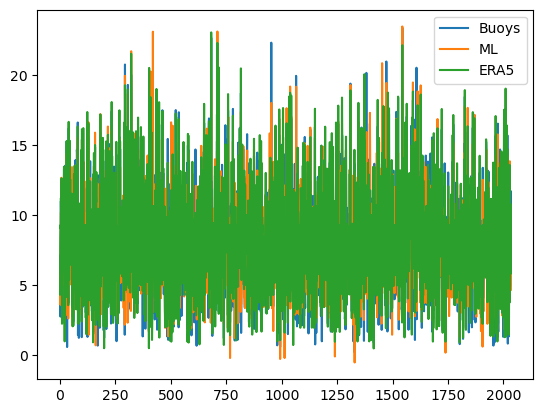

In [42]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

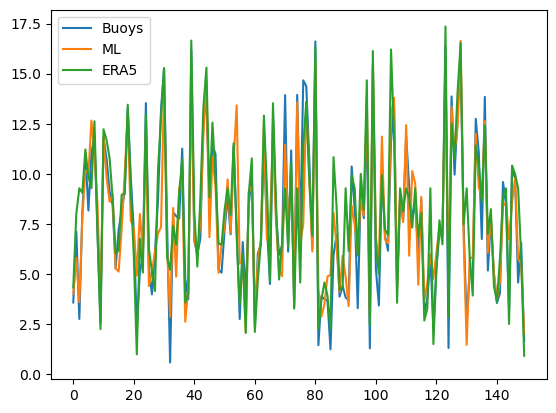

In [45]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

## Correlation

In [46]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91034809],
       [0.91034809, 1.        ]])

In [47]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

Text(0, 0.5, 'Wind speed ML [m/s]')

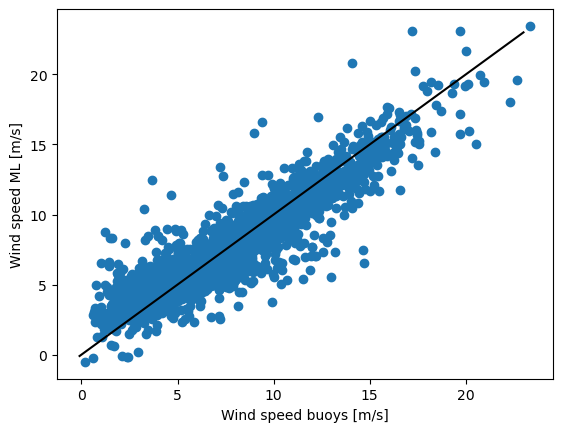

In [48]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed buoys [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [49]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [50]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [51]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 41ms/step - loss: 21.0615 - mean_absolute_error: 2.8751 - val_loss: 0.8689 - val_mean_absolute_error: 0.7395
Epoch 2/500
12/12 [==============================] - 0s 32ms/step - loss: 1.4971 - mean_absolute_error: 0.9391 - val_loss: 0.7882 - val_mean_absolute_error: 0.7069
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.1021 - mean_absolute_error: 0.8031 - val_loss: 0.8534 - val_mean_absolute_error: 0.7442
Epoch 4/500
12/12 [==============================] - 0s 31ms/step - loss: 0.9172 - mean_absolute_error: 0.7313 - val_loss: 0.8543 - val_mean_absolute_error: 0.7442
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 0.9132 - mean_absolute_error: 0.7329 - val_loss: 0.8462 - val_mean_absolute_error: 0.7406
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.8849 - mean_absolute_error: 0.7183 - val_loss: 0.8183 - val_mean_absolute_error: 0.7259
Epoch 7/500
12/

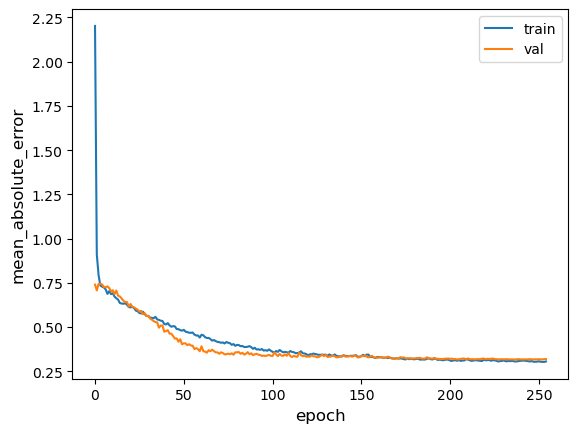

64/64 [==============================] - 0s 2ms/step - loss: 0.1767 - mean_absolute_error: 0.3029
Test accuracy 0.30291470885276794
Test loss 0.1766660362482071


In [52]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [53]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [54]:
rmse(y_test.values, y_test_pred)

5.337587675744752

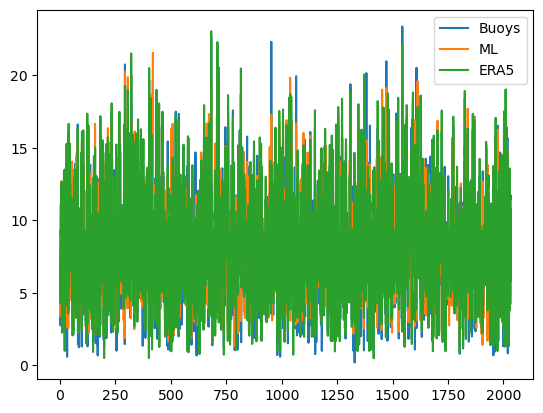

In [55]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

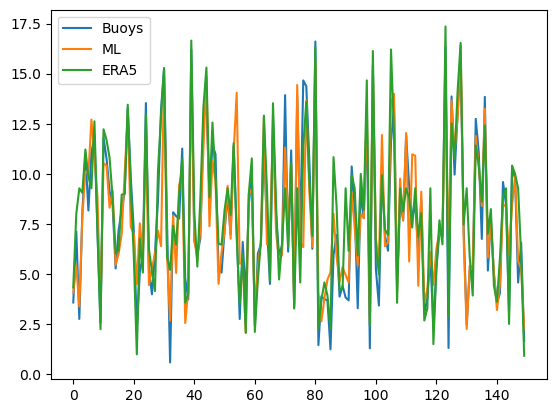

In [56]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91204389],
       [0.91204389, 1.        ]])

In [58]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

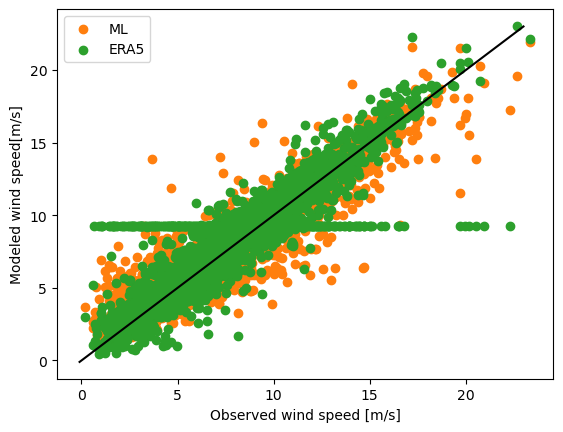

In [60]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, era5_test.values, label='ERA5', color='C2')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed[m/s]') 
plt.legend()

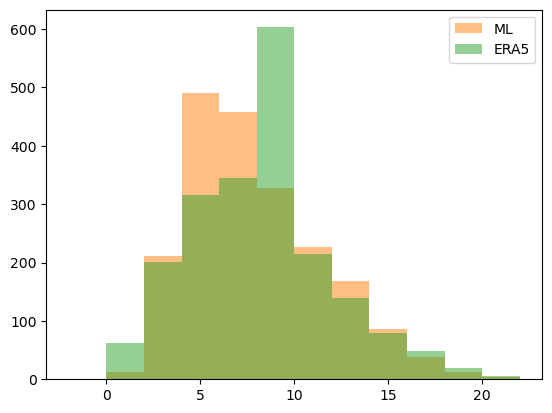

In [61]:
plt.hist(y_test_pred, label='ML', color='C1', alpha=0.5, bins=np.arange(-2, 23, 2)  )
plt.hist(era5_test.values, label='ERA5', color='C2', alpha=0.5, bins=np.arange(-2, 23, 2) )
plt.legend()

# Best model

In [62]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [63]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [64]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 40ms/step - loss: 19.1215 - mean_absolute_error: 2.7944 - val_loss: 0.8994 - val_mean_absolute_error: 0.7522
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 1.5208 - mean_absolute_error: 0.9509 - val_loss: 0.8200 - val_mean_absolute_error: 0.7179
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1120 - mean_absolute_error: 0.7971 - val_loss: 0.8736 - val_mean_absolute_error: 0.7461
Epoch 4/500
12/12 [==============================] - 0s 31ms/step - loss: 0.9286 - mean_absolute_error: 0.7410 - val_loss: 0.8867 - val_mean_absolute_error: 0.7590
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 0.9402 - mean_absolute_error: 0.7421 - val_loss: 0.8756 - val_mean_absolute_error: 0.7541
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.8418 - mean_absolute_error: 0.6980 - val_loss: 0.9071 - val_mean_absolute_error: 0.7753
Epoch 7/500
12/

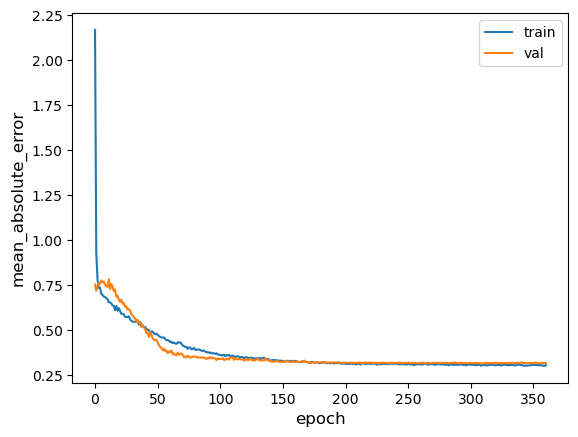

64/64 [==============================] - 0s 3ms/step - loss: 0.1749 - mean_absolute_error: 0.3026
Test accuracy 0.302631139755249
Test loss 0.17487655580043793


In [65]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [66]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [67]:
rmse(y_test.values, y_test_pred)

5.387431698056863

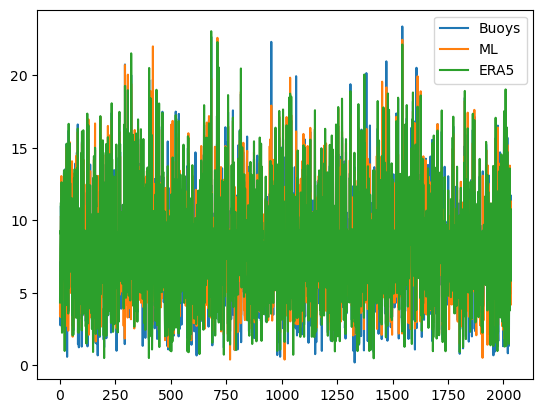

In [68]:
plt.plot(y_test.values, label='Buoys')
plt.plot(y_test_pred, label='ML')
plt.plot(era5_test.values, label='ERA5')
plt.legend()

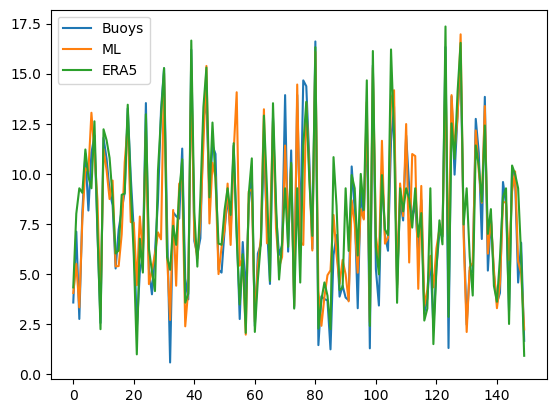

In [69]:
plt.plot(y_test.values[:150], label='Buoys')
plt.plot(y_test_pred[:150], label='ML')
plt.plot(era5_test.values[:150], label='ERA5')
plt.legend()

## Correlation

In [70]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91325278],
       [0.91325278, 1.        ]])

In [71]:
np.corrcoef(y_test.values, era5_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

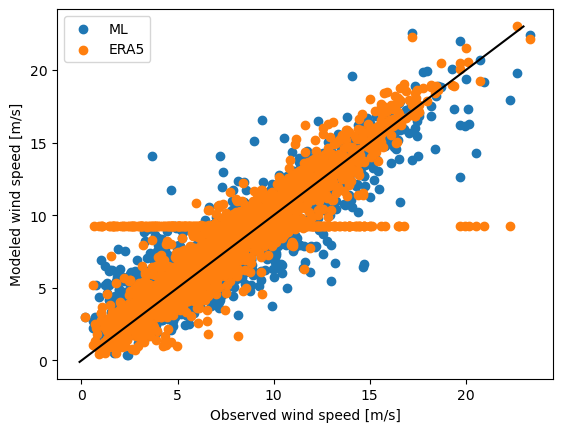

In [72]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, era5_test.values, label='ERA5')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

(array([ 687., 2203., 2724., 2144., 1386.,  673.,  264.,   78.,   33.,
           3.]),
 array([ 0.19124644,  2.76472869,  5.33821095,  7.91169321, 10.48517547,
        13.05865773, 15.63213998, 18.20562224, 20.7791045 , 23.35258676,
        25.92606902]),
 <BarContainer object of 10 artists>)

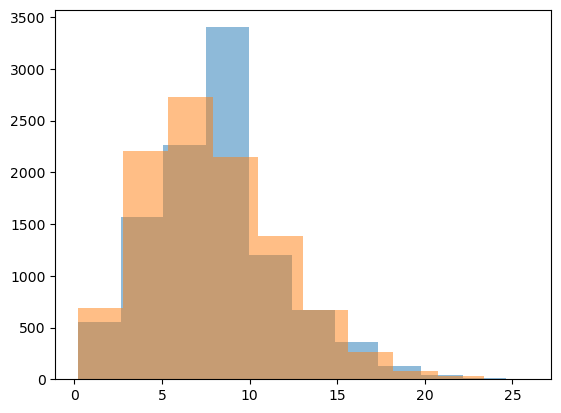

In [75]:
plt.hist(era5, alpha=0.5)
plt.hist(y, alpha=0.5)

Text(0, 0.5, 'ERA5 u10 [m/s]')

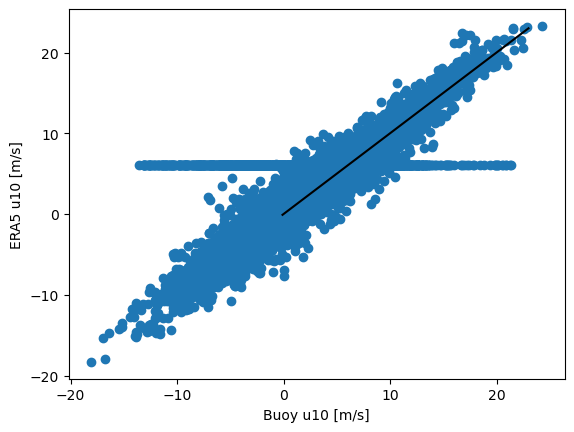

In [80]:
plt.scatter(df['UE'], df['u10'], label='ML')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Buoy u10 [m/s]') 
plt.ylabel('ERA5 u10 [m/s]') 

Text(0, 0.5, 'ERA5 u10 [m/s]')

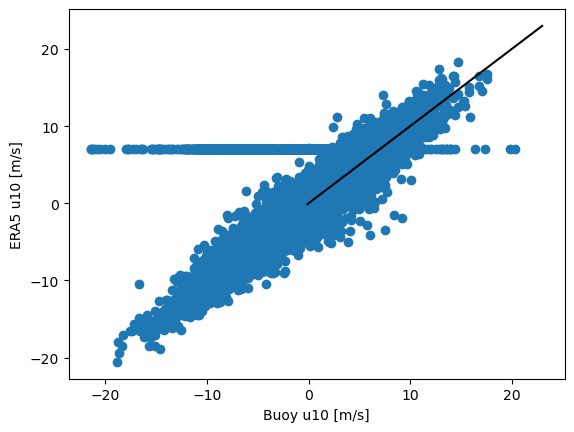

In [85]:
plt.scatter(df['UN'], df['v10'], label='ML')
#plt.scatter(df['UE'], df['u10'], label='ML')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Buoy u10 [m/s]') 
plt.ylabel('ERA5 u10 [m/s]') 

In [82]:
df['v10'].mode()

0    7.03716
Name: v10, dtype: float64

In [83]:
df['u10'].mode()

0    6.045154
Name: u10, dtype: float64

(array([  17.,   93.,  704., 1547., 2556., 3250., 1239.,  572.,  175.,
          42.]),
 array([-18.31841469, -14.15718136,  -9.99594803,  -5.8347147 ,
         -1.67348137,   2.48775196,   6.64898529,  10.81021862,
         14.97145195,  19.13268528,  23.29391861]),
 <BarContainer object of 10 artists>)

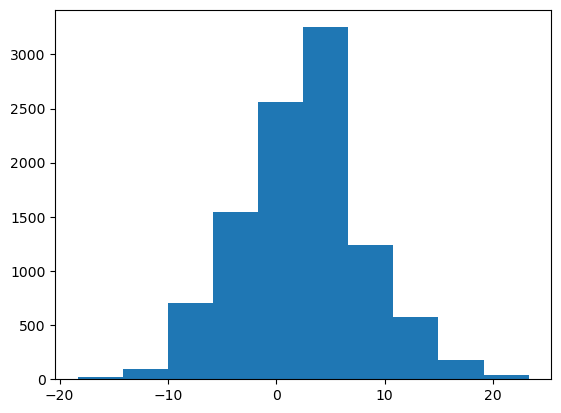

In [98]:
plt.hist(df['u10'])

# ERA5

In [86]:
data_dir_era5 = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/era5_buoys/'

## Eample

In [88]:
import xarray as xr

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


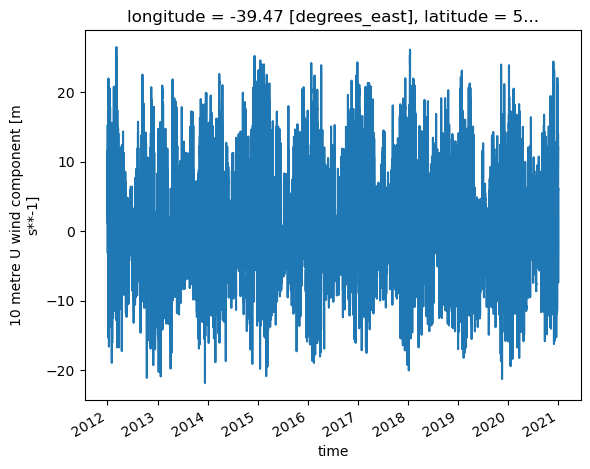

In [91]:
file = 'era_u10m_Irminger_6.nc'
era5 = xr.open_dataset(data_dir_era5 + file)
era5['u10'].sel(
        {
        #'time':'2020-01-22 07:11:00.006928', 
        'latitude':59.9337, 
        'longitude':-39.47378
        },
        method='nearest'
        ).plot()

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


(array([  157.,  1776.,  6653., 14993., 20033., 16621., 10173.,  5998.,
         2177.,   331.]),
 array([-21.88105  , -17.041597 , -12.202144 ,  -7.362691 ,  -2.5232377,
          2.3162155,   7.1556687,  11.995122 ,  16.834576 ,  21.674028 ,
         26.513481 ], dtype=float32),
 <BarContainer object of 10 artists>)

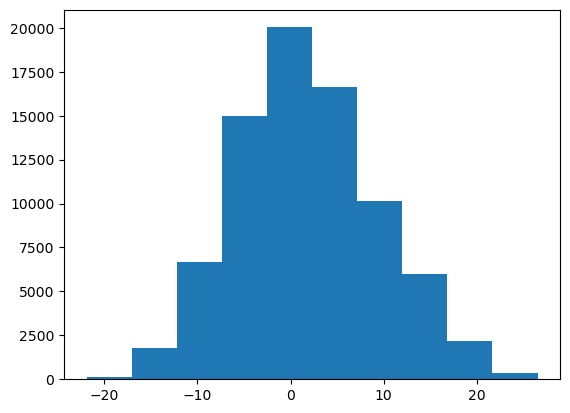

In [97]:
plt.hist(era5['u10'].sel(
        {
        #'time':'2020-01-22 07:11:00.006928', 
        'latitude':59.9337, 
        'longitude':-39.47378
        },
        method='nearest'
        ))

In [95]:
from scipy import stats as st

In [96]:
st.mode(era5['u10'].sel(
        {
        #'time':'2020-01-22 07:11:00.006928', 
        'latitude':59.9337, 
        'longitude':-39.47378
        },
        method='nearest'
        ))

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


ModeResult(mode=array([0.88530004], dtype=float32), count=array([13]))

In [99]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [100]:
with open(data_dir + 'in_situ_obs_with_gridded_ascat_params_9000_images.pickle', 'rb') as handle:
    ascat_dict = pickle.load(handle)

In [101]:
ascat_dict.keys()

dict_keys(['Endurance_8', 'Irminger_7', 'SPURS2', 'Endurance_4', 'Irminger_6', 'Pioneer_5', 'CLIMODE', 'Endurance_9', 'Pioneer_10', 'SouthernOcean2', 'Endurance_3', 'Pioneer_3', 'SPURS1', 'Endurance_7', 'Irminger_3', 'Pioneer_7', 'Pioneer_6', 'Pioneer_8'])

In [102]:
ascat_dict['Endurance_8']['lat']

[44.6393]

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_l

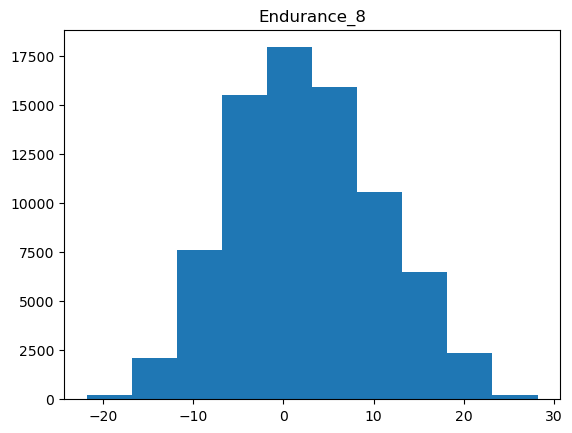

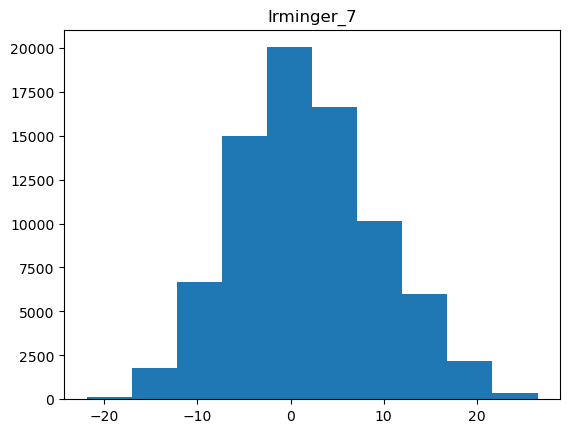

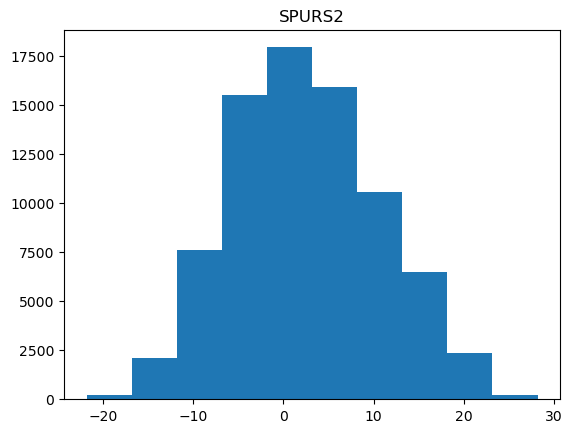

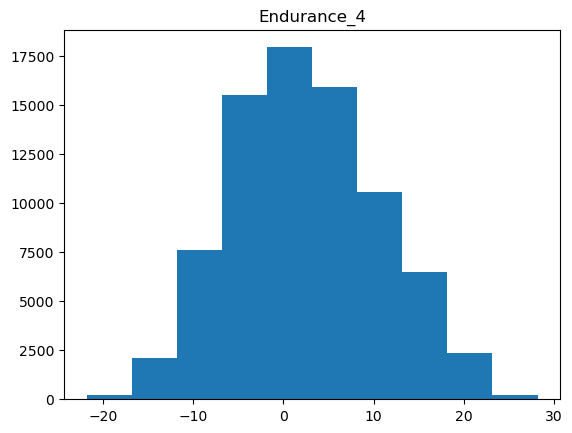

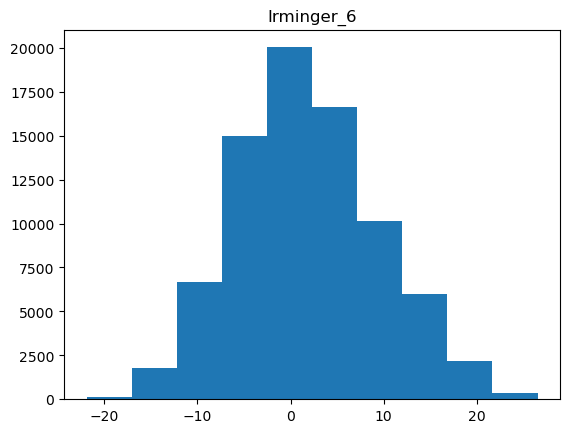

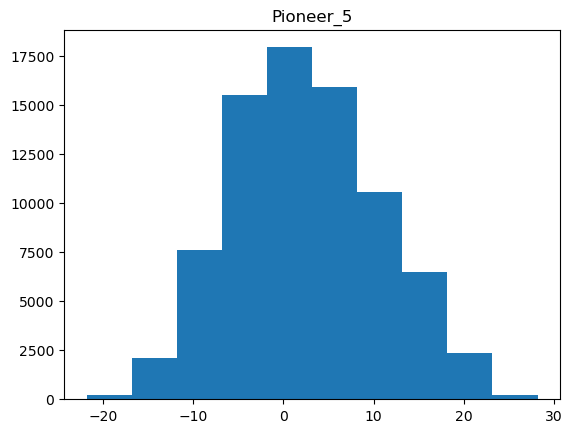

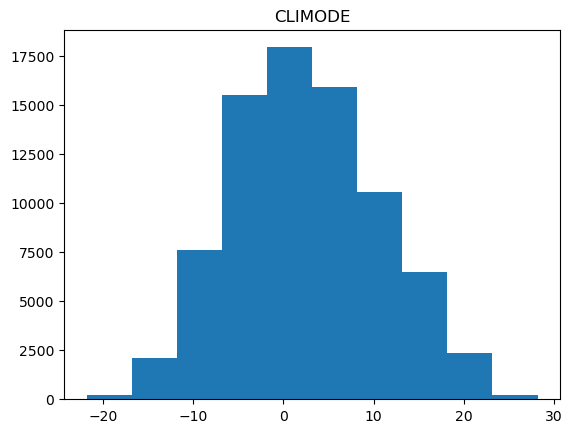

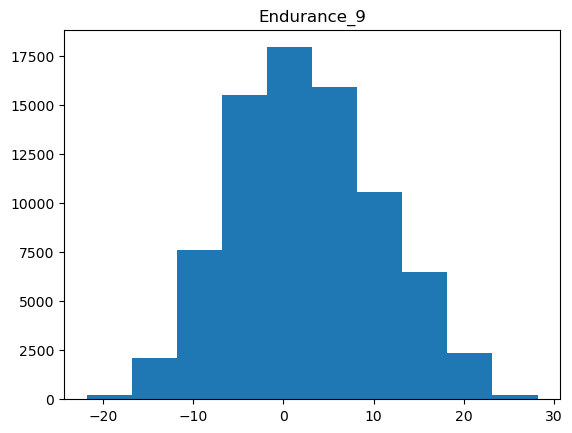

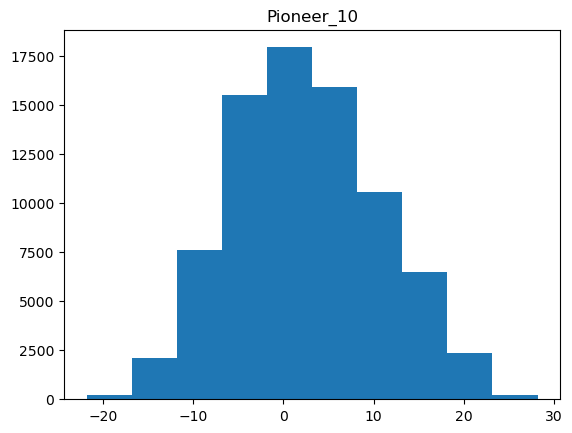

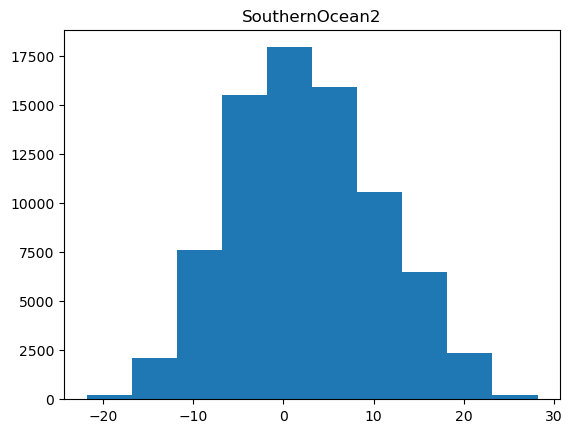

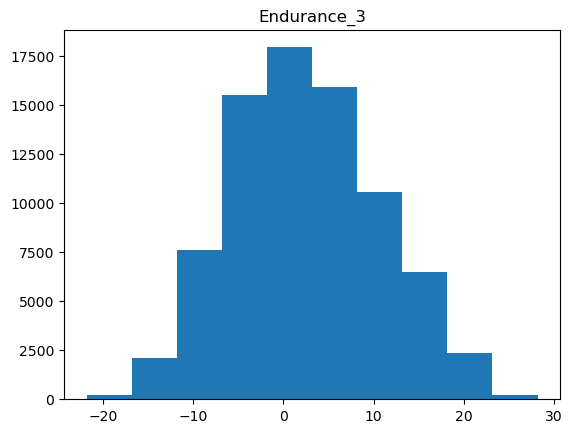

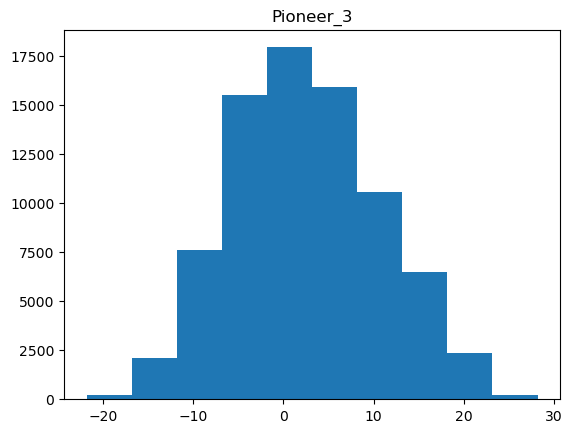

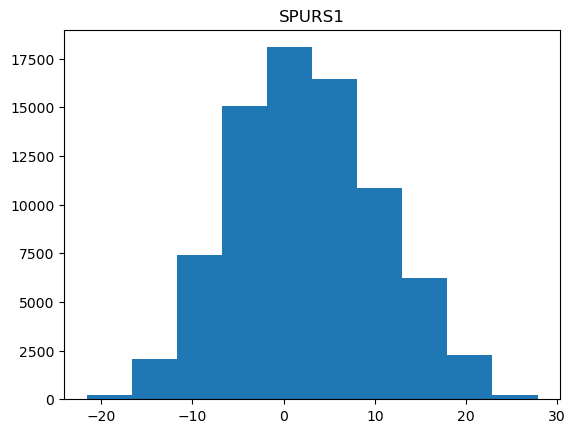

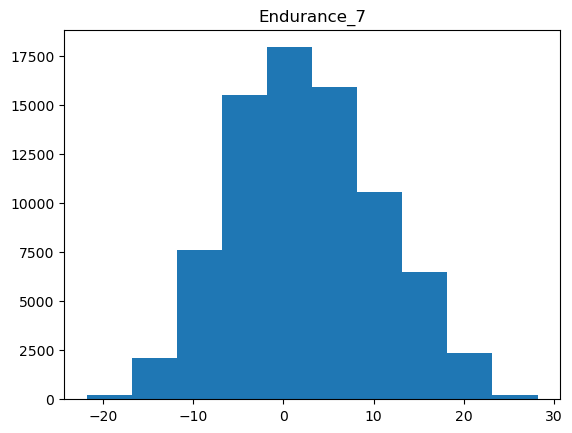

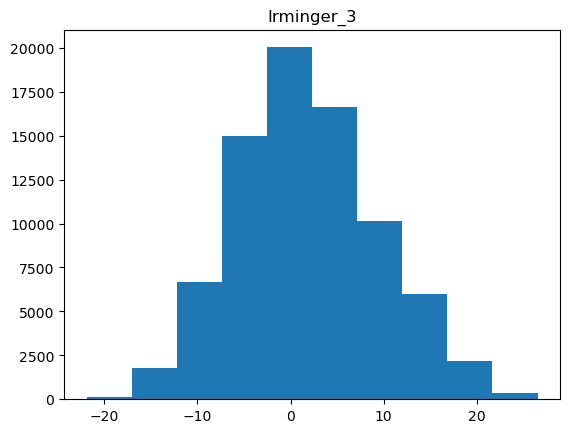

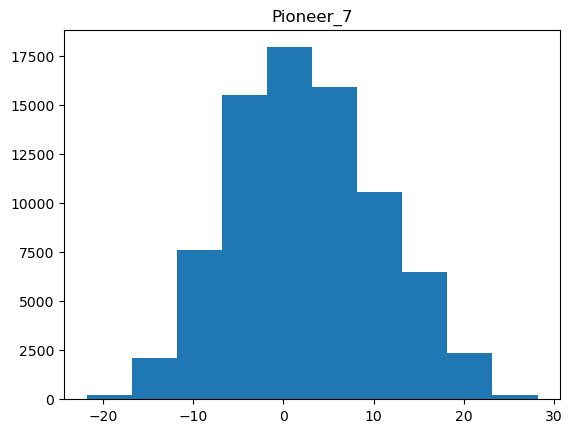

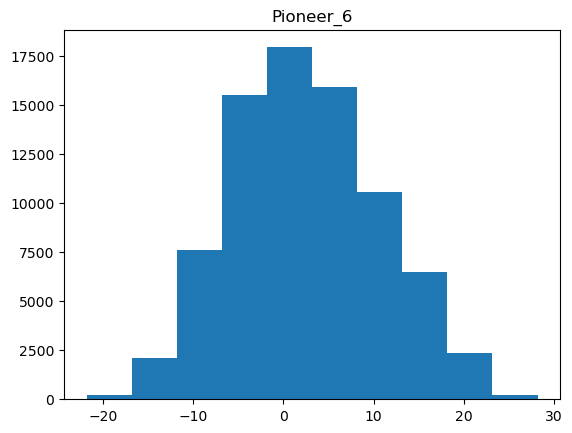

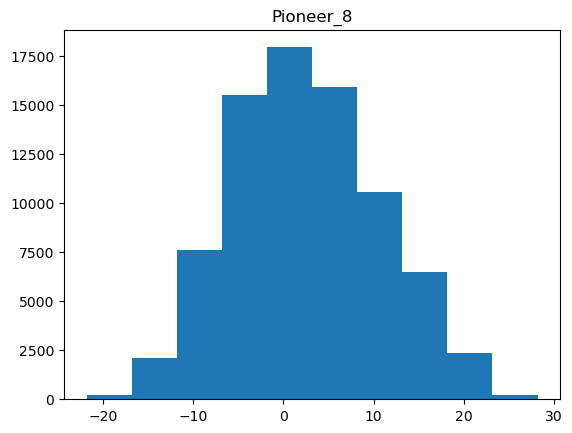

In [104]:
for key in ascat_dict.keys():
    lat = ascat_dict[key]['lat'][0]
    lon = ascat_dict[key]['lon'][0]
    plt.figure()
    plt.hist(era5['u10'].sel(
        {
        'latitude':lat, 
        'longitude':lon
        },
        method='nearest'
        ))
    plt.title(key)

In [109]:
for key in ['Irminger_3']:
    lat = ascat_dict[key]['lat'][0]
    lon = ascat_dict[key]['lon'][0]
    print(st.mode(era5['u10'].sel(
        {
        'latitude':lat, 
        'longitude':lon
        },
        method='nearest'
        )))

ModeResult(mode=array([0.88530004], dtype=float32), count=array([13]))


/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [ ]:
['Endurance_7',
 'SPURS1',
 'Endurance_3',
 'Pioneer_6',
 'Endurance_8',
 'Pioneer_8',
 'Irminger_3',
 'SPURS2',
 'SouthernOcean2',
 'Pioneer_5',
 'Pioneer_3',
 'Pioneer_7',
 'Endurance_4',
 'CLIMODE',
 'Irminger_7',
 'Endurance_9',
 'Pioneer_10',
 'Irminger_6']